In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [ ]:
#download puffin.py from https://github.com/jzhoulab/puffin

from puffin import *

puffin = Puffin()

In [ ]:
plasmid_seq = ['ccgggagtactgtcctccgagcggagtactgtcctccgagcgggaagcttgcatgcctgcaggtcggagtactgtcctccgagcggagtactgtcctccgaggacccagctttcttgtacaaagtggtagatcttagagcatgcaccggTAGAGCATGCACCGGACACTCTTTCCCTACACGACGCTCTTCCGATCTTAAGGTCTTGGCTTTCTAGTAGCACCGCGTTCAACTCCAGGAAGACTCAGGCCACCGGAGACCCAGGGTTGGGACAGCCTGGGATCTGTCAGCACGGTAGCGGGCGGGGGCGGGGCTTCGGGCCGGGGCGGGGCCGGGCTGGGCGGGCTGGGCCGGCCTGGGCGGGGCGCGCGACTGCTCCGGGCGGCGATGGCGGCGGACGGGGACTGGCAGGATTTCTATGAGTTCCAGGAGCCGGCCCACACCATGCAGATCGGAAGAGCACACGTCTGAACTCCAGTCACTCGACGAATTCGGCCtcgacgaattcggcccctgcaggggcattccggtactgttggtaaagccaccatggaagtaagtatcaaggttacaagacaggtttaaggagaccaatagaaactgggcttgtcgagacagagaagactcttgcgtttctgataggcacctattggtcttactgacatccactttgcctttctctccacagccacttaagcatggctagcaaaggagaagaactcttcactggagttgtcccaattcttgttgaattagatggtgatgttaacggccacaagttctctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttaccctgaagttcatctgcactactggcaaactgcctgttccctggccaacactagtctgatctagagtcggggcggccggccgcttcgagcagacatgataagatacattgatgagtttggacaaaccacaactagaatgcagtgaaaaaaatgctttatttgtgaaatttgtgatgctattgctttatttgtaaccattataagctgcaataaacaagttaacaacaacaattgcattcattttatgtttcaggttcagggggaggtgtgggaggttttttaaagcaagtaaaacctctacaaatgtggtaaaatcgataaggatccgaccgatgccctcaagctttgagaggggcccccttcaacccagtcagctccgacgtcttggcgcccccgcggggcatgactatcgtcgtcgcacttatgactgtcttctttatcatgcaactcgtaggacaggtgccggcagcgctcttccgcttcctcgctcactgactcgctgcgctcggtcgttcggctgcggcgagcggtatcagctcactcaaaggcggtaatacggttatccacagaatcaggggataacgcaggaaagaacatgtgagcaaaaggccagcaaaaggccaggaaccgtaaaaaggccgcgttgctggcgtttttccataggctccgcccccctgacgagcatcacaaaaatcgacgctcaagtcagaggtggcgaaacccgacaggactataaagataccaggcgtttccccctggaagctccctcgtgcgctctcctgttccgaccctgccgcttaccggatacctgtccgcctttctcccttcgggaagcgtggcgctttctcatagctcacgctgtaggtatctcagttcggtgtaggtcgttcgctccaagctgggctgtgtgcacgaaccccccgttcagcccgaccgctgcgccttatccggtaactatcgtcttgagtccaacccggtaagacacgacttatcgccactggcagcagccactggtaacaggattagcagagcgaggtatgtaggcggtgctacagagttcttgaagtggtggcctaactacggctacactagaagaacagtatttggtatctgcgctctgctgaagccagttaccttcggaaaaagagttggtagctcttgatccggcaaacaaaccaccgctggtagcggtggtttttttgtttgcaagcagcagattacgcgcagaaaaaaaggatctcaagaagatcctttgatcttttctacggggtctgacgctcagtggaacgaaaactcacgttaagggattttggtcatgagattatcaaaaaggatcttcacctagatccttttaaattaaaaatgaagttttaaatcaatctaaagtatatatgagtaaacttggtctgacagcggccgcaaatgctaaaccactgcagtggttaccagtgcttgatcagtgaggcaccgatctcagcgatctgcctatttcgttcgtccatagtggcctgactccccgtcgtgtagatcactacgattcgtgagggcttaccatcaggccccagcgcagcaatgatgccgcgagagccgcgttcaccggcccccgatttgtcagcaatgaaccagccagcagggagggccgagcgaagaagtggtcctgctactttgtccgcctccatccagtctatgagctgctgtcgtgatgctagagtaagaagttcgccagtgagtagtttccgaagagttgtggccattgctactggcatcgtggtatcacgctcgtcgttcggtatggcttcgttcaactctggttcccagcggtcaagccgggtcacatgatcacccatattatgaagaaatgcagtcagctccttagggcctccgatcgttgtcagaagtaagttggccgcggtgttgtcgctcatggtaatggcagcactacacaattctcttaccgtcatgccatccgtaagatgcttttccgtgaccggcgagtactcaaccaagtcgttttgtgagtagtgtatacggcgaccaagctgctcttgcccggcgtctatacgggacaacaccgcgccacatagcagtactttgaaagtgctcatcatcgggaatcgttcttcggggcggaaagactcaaggatcttgccgctattgagatccagttcgatatagcccactcttgcacccagttgatcttcagcatcttttactttcaccagcgtttcggggtgtgcaaaaacaggcaagcaaaatgccgcaaagaagggaatgagtgcgacacgaaaatgttggatgctcatactcgtcctttttcaatattattgaagcatttatcagggttactagtacgtctctcaaggataagtaagtaatattaaggtacgggaggtattggacaggccgcaataaaatatctttattttcattacatctgtgtgttggttttttgtgtgaatcgatagtactaacatacgctctccatcaaaacaaaacgaaacaaaacaaactagcaaaataggctgtccccagtgcaagtgcaggtgccagaacatttctctggcctaactggccggtacctgagctcgctagcctcgaggatatcaaacaagtttgtacaaaaaagcaggctt',
              'ccgggagtactgtcctccgagcggagtactgtcctccgagcgggaagcttgcatgcctgcaggtcggagtactgtcctccgagcggagtactgtcctccgaggacccagctttcttgtacaaagtggtagatcttagagcatgcaccggTAGAGCATGCACCGGACACTCTTTCCCTACACGACGCTCTTCCGATCTTAAGGTCTTGGCTTTCTAGTAGCACCGCGTTCAACTCCAGGAAGACTCAGGCCACCGGAGACCCAGGGTTGGGACAGCCTGGGATCTGTCAGCACGGTAGCGGGCCGTGCCGAGGCTTCGGGCCGGGGCGGGGCCGGGCTGGGCGGGCTGGGCCGGCCTGGGCGGGGCGCGCGACTGCTCCGGGCGGCGATGGCGGCGGACGGGGACTGGCAGGATTTCTATGAGTTCCAGGAGCCGGCCGATTAACCGCAGATCGGAAGAGCACACGTCTGAACTCCAGTCACTCGACGAATTCGGCCtcgacgaattcggcccctgcaggggcattccggtactgttggtaaagccaccatggaagtaagtatcaaggttacaagacaggtttaaggagaccaatagaaactgggcttgtcgagacagagaagactcttgcgtttctgataggcacctattggtcttactgacatccactttgcctttctctccacagccacttaagcatggctagcaaaggagaagaactcttcactggagttgtcccaattcttgttgaattagatggtgatgttaacggccacaagttctctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttaccctgaagttcatctgcactactggcaaactgcctgttccctggccaacactagtctgatctagagtcggggcggccggccgcttcgagcagacatgataagatacattgatgagtttggacaaaccacaactagaatgcagtgaaaaaaatgctttatttgtgaaatttgtgatgctattgctttatttgtaaccattataagctgcaataaacaagttaacaacaacaattgcattcattttatgtttcaggttcagggggaggtgtgggaggttttttaaagcaagtaaaacctctacaaatgtggtaaaatcgataaggatccgaccgatgccctcaagctttgagaggggcccccttcaacccagtcagctccgacgtcttggcgcccccgcggggcatgactatcgtcgtcgcacttatgactgtcttctttatcatgcaactcgtaggacaggtgccggcagcgctcttccgcttcctcgctcactgactcgctgcgctcggtcgttcggctgcggcgagcggtatcagctcactcaaaggcggtaatacggttatccacagaatcaggggataacgcaggaaagaacatgtgagcaaaaggccagcaaaaggccaggaaccgtaaaaaggccgcgttgctggcgtttttccataggctccgcccccctgacgagcatcacaaaaatcgacgctcaagtcagaggtggcgaaacccgacaggactataaagataccaggcgtttccccctggaagctccctcgtgcgctctcctgttccgaccctgccgcttaccggatacctgtccgcctttctcccttcgggaagcgtggcgctttctcatagctcacgctgtaggtatctcagttcggtgtaggtcgttcgctccaagctgggctgtgtgcacgaaccccccgttcagcccgaccgctgcgccttatccggtaactatcgtcttgagtccaacccggtaagacacgacttatcgccactggcagcagccactggtaacaggattagcagagcgaggtatgtaggcggtgctacagagttcttgaagtggtggcctaactacggctacactagaagaacagtatttggtatctgcgctctgctgaagccagttaccttcggaaaaagagttggtagctcttgatccggcaaacaaaccaccgctggtagcggtggtttttttgtttgcaagcagcagattacgcgcagaaaaaaaggatctcaagaagatcctttgatcttttctacggggtctgacgctcagtggaacgaaaactcacgttaagggattttggtcatgagattatcaaaaaggatcttcacctagatccttttaaattaaaaatgaagttttaaatcaatctaaagtatatatgagtaaacttggtctgacagcggccgcaaatgctaaaccactgcagtggttaccagtgcttgatcagtgaggcaccgatctcagcgatctgcctatttcgttcgtccatagtggcctgactccccgtcgtgtagatcactacgattcgtgagggcttaccatcaggccccagcgcagcaatgatgccgcgagagccgcgttcaccggcccccgatttgtcagcaatgaaccagccagcagggagggccgagcgaagaagtggtcctgctactttgtccgcctccatccagtctatgagctgctgtcgtgatgctagagtaagaagttcgccagtgagtagtttccgaagagttgtggccattgctactggcatcgtggtatcacgctcgtcgttcggtatggcttcgttcaactctggttcccagcggtcaagccgggtcacatgatcacccatattatgaagaaatgcagtcagctccttagggcctccgatcgttgtcagaagtaagttggccgcggtgttgtcgctcatggtaatggcagcactacacaattctcttaccgtcatgccatccgtaagatgcttttccgtgaccggcgagtactcaaccaagtcgttttgtgagtagtgtatacggcgaccaagctgctcttgcccggcgtctatacgggacaacaccgcgccacatagcagtactttgaaagtgctcatcatcgggaatcgttcttcggggcggaaagactcaaggatcttgccgctattgagatccagttcgatatagcccactcttgcacccagttgatcttcagcatcttttactttcaccagcgtttcggggtgtgcaaaaacaggcaagcaaaatgccgcaaagaagggaatgagtgcgacacgaaaatgttggatgctcatactcgtcctttttcaatattattgaagcatttatcagggttactagtacgtctctcaaggataagtaagtaatattaaggtacgggaggtattggacaggccgcaataaaatatctttattttcattacatctgtgtgttggttttttgtgtgaatcgatagtactaacatacgctctccatcaaaacaaaacgaaacaaaacaaactagcaaaataggctgtccccagtgcaagtgcaggtgccagaacatttctctggcctaactggccggtacctgagctcgctagcctcgaggatatcaaacaagtttgtacaaaaaagcaggctt',
              'ccgggagtactgtcctccgagcggagtactgtcctccgagcgggaagcttgcatgcctgcaggtcggagtactgtcctccgagcggagtactgtcctccgaggacccagctttcttgtacaaagtggtagatcttagagcatgcaccggTAGAGCATGCACCGGACACTCTTTCCCTACACGACGCTCTTCCGATCTGATGTAGAGCTGCATACTACCATTAGGAGGCGCACCCTCAGGCCTCGGCTCCGCGTTCTTTATGTCTCTGGACCGCTCTCTCTCGCAGCTCATCTCTATGGTTTCCGTTGGGTGTGTGGTTTTTTTGTTTTTTTTTTTTTGGGGTCCGGAATAGGCGGAGCTTCCGGTTCCGGTGGGGGCCGTCCCTGGCGGCGGAGATGGCGGCGACAGCGGCGGAGGCTGTGGCCTCTGGCTCTGGAGCCTTGACTGGAGATCGGAAGAGCACACGTCTGAACTCCAGTCACTCGACGAATTCGGCCtcgacgaattcggcccctgcaggggcattccggtactgttggtaaagccaccatggaagtaagtatcaaggttacaagacaggtttaaggagaccaatagaaactgggcttgtcgagacagagaagactcttgcgtttctgataggcacctattggtcttactgacatccactttgcctttctctccacagccacttaagcatggctagcaaaggagaagaactcttcactggagttgtcccaattcttgttgaattagatggtgatgttaacggccacaagttctctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttaccctgaagttcatctgcactactggcaaactgcctgttccctggccaacactagtctgatctagagtcggggcggccggccgcttcgagcagacatgataagatacattgatgagtttggacaaaccacaactagaatgcagtgaaaaaaatgctttatttgtgaaatttgtgatgctattgctttatttgtaaccattataagctgcaataaacaagttaacaacaacaattgcattcattttatgtttcaggttcagggggaggtgtgggaggttttttaaagcaagtaaaacctctacaaatgtggtaaaatcgataaggatccgaccgatgccctcaagctttgagaggggcccccttcaacccagtcagctccgacgtcttggcgcccccgcggggcatgactatcgtcgtcgcacttatgactgtcttctttatcatgcaactcgtaggacaggtgccggcagcgctcttccgcttcctcgctcactgactcgctgcgctcggtcgttcggctgcggcgagcggtatcagctcactcaaaggcggtaatacggttatccacagaatcaggggataacgcaggaaagaacatgtgagcaaaaggccagcaaaaggccaggaaccgtaaaaaggccgcgttgctggcgtttttccataggctccgcccccctgacgagcatcacaaaaatcgacgctcaagtcagaggtggcgaaacccgacaggactataaagataccaggcgtttccccctggaagctccctcgtgcgctctcctgttccgaccctgccgcttaccggatacctgtccgcctttctcccttcgggaagcgtggcgctttctcatagctcacgctgtaggtatctcagttcggtgtaggtcgttcgctccaagctgggctgtgtgcacgaaccccccgttcagcccgaccgctgcgccttatccggtaactatcgtcttgagtccaacccggtaagacacgacttatcgccactggcagcagccactggtaacaggattagcagagcgaggtatgtaggcggtgctacagagttcttgaagtggtggcctaactacggctacactagaagaacagtatttggtatctgcgctctgctgaagccagttaccttcggaaaaagagttggtagctcttgatccggcaaacaaaccaccgctggtagcggtggtttttttgtttgcaagcagcagattacgcgcagaaaaaaaggatctcaagaagatcctttgatcttttctacggggtctgacgctcagtggaacgaaaactcacgttaagggattttggtcatgagattatcaaaaaggatcttcacctagatccttttaaattaaaaatgaagttttaaatcaatctaaagtatatatgagtaaacttggtctgacagcggccgcaaatgctaaaccactgcagtggttaccagtgcttgatcagtgaggcaccgatctcagcgatctgcctatttcgttcgtccatagtggcctgactccccgtcgtgtagatcactacgattcgtgagggcttaccatcaggccccagcgcagcaatgatgccgcgagagccgcgttcaccggcccccgatttgtcagcaatgaaccagccagcagggagggccgagcgaagaagtggtcctgctactttgtccgcctccatccagtctatgagctgctgtcgtgatgctagagtaagaagttcgccagtgagtagtttccgaagagttgtggccattgctactggcatcgtggtatcacgctcgtcgttcggtatggcttcgttcaactctggttcccagcggtcaagccgggtcacatgatcacccatattatgaagaaatgcagtcagctccttagggcctccgatcgttgtcagaagtaagttggccgcggtgttgtcgctcatggtaatggcagcactacacaattctcttaccgtcatgccatccgtaagatgcttttccgtgaccggcgagtactcaaccaagtcgttttgtgagtagtgtatacggcgaccaagctgctcttgcccggcgtctatacgggacaacaccgcgccacatagcagtactttgaaagtgctcatcatcgggaatcgttcttcggggcggaaagactcaaggatcttgccgctattgagatccagttcgatatagcccactcttgcacccagttgatcttcagcatcttttactttcaccagcgtttcggggtgtgcaaaaacaggcaagcaaaatgccgcaaagaagggaatgagtgcgacacgaaaatgttggatgctcatactcgtcctttttcaatattattgaagcatttatcagggttactagtacgtctctcaaggataagtaagtaatattaaggtacgggaggtattggacaggccgcaataaaatatctttattttcattacatctgtgtgttggttttttgtgtgaatcgatagtactaacatacgctctccatcaaaacaaaacgaaacaaaacaaactagcaaaataggctgtccccagtgcaagtgcaggtgccagaacatttctctggcctaactggccggtacctgagctcgctagcctcgaggatatcaaacaagtttgtacaaaaaagcaggctt',
              'ccgggagtactgtcctccgagcggagtactgtcctccgagcgggaagcttgcatgcctgcaggtcggagtactgtcctccgagcggagtactgtcctccgaggacccagctttcttgtacaaagtggtagatcttagagcatgcaccggTAGAGCATGCACCGGACACTCTTTCCCTACACGACGCTCTTCCGATCTGATGTAGAGCTGCATACTACCATTAGGAGGCGCACCCTCAGGCCTCGGCTCCGCGTTCTTTATGTCTCTGGACCGCTCTCTCTCGCAGCTCATCTCTATGGTTTCCGTTGGGTGTGTGGTTTTTTTGTTTTTTTTTTTTTGGGGTCCGGAATAGGCGGCCACCGTTCGTCCGGTGGGGGCCGTCCCTGGCGGCGGAGATGGCGGCGACAGCGGCGGAGGCTGTGGCCTCTGGCTCTGGAGCTCTTGGTGTAGATCGGAAGAGCACACGTCTGAACTCCAGTCACTCGACGAATTCGGCCtcgacgaattcggcccctgcaggggcattccggtactgttggtaaagccaccatggaagtaagtatcaaggttacaagacaggtttaaggagaccaatagaaactgggcttgtcgagacagagaagactcttgcgtttctgataggcacctattggtcttactgacatccactttgcctttctctccacagccacttaagcatggctagcaaaggagaagaactcttcactggagttgtcccaattcttgttgaattagatggtgatgttaacggccacaagttctctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttaccctgaagttcatctgcactactggcaaactgcctgttccctggccaacactagtctgatctagagtcggggcggccggccgcttcgagcagacatgataagatacattgatgagtttggacaaaccacaactagaatgcagtgaaaaaaatgctttatttgtgaaatttgtgatgctattgctttatttgtaaccattataagctgcaataaacaagttaacaacaacaattgcattcattttatgtttcaggttcagggggaggtgtgggaggttttttaaagcaagtaaaacctctacaaatgtggtaaaatcgataaggatccgaccgatgccctcaagctttgagaggggcccccttcaacccagtcagctccgacgtcttggcgcccccgcggggcatgactatcgtcgtcgcacttatgactgtcttctttatcatgcaactcgtaggacaggtgccggcagcgctcttccgcttcctcgctcactgactcgctgcgctcggtcgttcggctgcggcgagcggtatcagctcactcaaaggcggtaatacggttatccacagaatcaggggataacgcaggaaagaacatgtgagcaaaaggccagcaaaaggccaggaaccgtaaaaaggccgcgttgctggcgtttttccataggctccgcccccctgacgagcatcacaaaaatcgacgctcaagtcagaggtggcgaaacccgacaggactataaagataccaggcgtttccccctggaagctccctcgtgcgctctcctgttccgaccctgccgcttaccggatacctgtccgcctttctcccttcgggaagcgtggcgctttctcatagctcacgctgtaggtatctcagttcggtgtaggtcgttcgctccaagctgggctgtgtgcacgaaccccccgttcagcccgaccgctgcgccttatccggtaactatcgtcttgagtccaacccggtaagacacgacttatcgccactggcagcagccactggtaacaggattagcagagcgaggtatgtaggcggtgctacagagttcttgaagtggtggcctaactacggctacactagaagaacagtatttggtatctgcgctctgctgaagccagttaccttcggaaaaagagttggtagctcttgatccggcaaacaaaccaccgctggtagcggtggtttttttgtttgcaagcagcagattacgcgcagaaaaaaaggatctcaagaagatcctttgatcttttctacggggtctgacgctcagtggaacgaaaactcacgttaagggattttggtcatgagattatcaaaaaggatcttcacctagatccttttaaattaaaaatgaagttttaaatcaatctaaagtatatatgagtaaacttggtctgacagcggccgcaaatgctaaaccactgcagtggttaccagtgcttgatcagtgaggcaccgatctcagcgatctgcctatttcgttcgtccatagtggcctgactccccgtcgtgtagatcactacgattcgtgagggcttaccatcaggccccagcgcagcaatgatgccgcgagagccgcgttcaccggcccccgatttgtcagcaatgaaccagccagcagggagggccgagcgaagaagtggtcctgctactttgtccgcctccatccagtctatgagctgctgtcgtgatgctagagtaagaagttcgccagtgagtagtttccgaagagttgtggccattgctactggcatcgtggtatcacgctcgtcgttcggtatggcttcgttcaactctggttcccagcggtcaagccgggtcacatgatcacccatattatgaagaaatgcagtcagctccttagggcctccgatcgttgtcagaagtaagttggccgcggtgttgtcgctcatggtaatggcagcactacacaattctcttaccgtcatgccatccgtaagatgcttttccgtgaccggcgagtactcaaccaagtcgttttgtgagtagtgtatacggcgaccaagctgctcttgcccggcgtctatacgggacaacaccgcgccacatagcagtactttgaaagtgctcatcatcgggaatcgttcttcggggcggaaagactcaaggatcttgccgctattgagatccagttcgatatagcccactcttgcacccagttgatcttcagcatcttttactttcaccagcgtttcggggtgtgcaaaaacaggcaagcaaaatgccgcaaagaagggaatgagtgcgacacgaaaatgttggatgctcatactcgtcctttttcaatattattgaagcatttatcagggttactagtacgtctctcaaggataagtaagtaatattaaggtacgggaggtattggacaggccgcaataaaatatctttattttcattacatctgtgtgttggttttttgtgtgaatcgatagtactaacatacgctctccatcaaaacaaaacgaaacaaaacaaactagcaaaataggctgtccccagtgcaagtgcaggtgccagaacatttctctggcctaactggccggtacctgagctcgctagcctcgaggatatcaaacaagtttgtacaaaaaagcaggctt',
              'ccgggagtactgtcctccgagcggagtactgtcctccgagcgggaagcttgcatgcctgcaggtcggagtactgtcctccgagcggagtactgtcctccgaggacccagctttcttgtacaaagtggtagatcttagagcatgcaccggTAGAGCATGCACCGGACACTCTTTCCCTACACGACGCTCTTCCGATCTGCCTCCCCAGGAACTTCTGCGACAGGGGCAGTGCAGTAAAATTTGAATCTGCGACCCCGGGCCAGGAGTGGTGGTGGAAACAGCAGCCCGGCCGCCGCGGCAGGGTGCGAGCGCGCGCACCGATTGGTCGCCGGGCCGCCTGGCCCACTGCGCCTGCGCAGTCCTCCTCCCGCACCGCCCTGTCGCCCAACGGCGGCCTCAGGAGTGATCGGGCAGCAGTCGGCCGGCCAGCGGACGGCATCGGGCGAGAAGATCGGAAGAGCACACGTCTGAACTCCAGTCACTCGACGAATTCGGCCtcgacgaattcggcccctgcaggggcattccggtactgttggtaaagccaccatggaagtaagtatcaaggttacaagacaggtttaaggagaccaatagaaactgggcttgtcgagacagagaagactcttgcgtttctgataggcacctattggtcttactgacatccactttgcctttctctccacagccacttaagcatggctagcaaaggagaagaactcttcactggagttgtcccaattcttgttgaattagatggtgatgttaacggccacaagttctctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttaccctgaagttcatctgcactactggcaaactgcctgttccctggccaacactagtctgatctagagtcggggcggccggccgcttcgagcagacatgataagatacattgatgagtttggacaaaccacaactagaatgcagtgaaaaaaatgctttatttgtgaaatttgtgatgctattgctttatttgtaaccattataagctgcaataaacaagttaacaacaacaattgcattcattttatgtttcaggttcagggggaggtgtgggaggttttttaaagcaagtaaaacctctacaaatgtggtaaaatcgataaggatccgaccgatgccctcaagctttgagaggggcccccttcaacccagtcagctccgacgtcttggcgcccccgcggggcatgactatcgtcgtcgcacttatgactgtcttctttatcatgcaactcgtaggacaggtgccggcagcgctcttccgcttcctcgctcactgactcgctgcgctcggtcgttcggctgcggcgagcggtatcagctcactcaaaggcggtaatacggttatccacagaatcaggggataacgcaggaaagaacatgtgagcaaaaggccagcaaaaggccaggaaccgtaaaaaggccgcgttgctggcgtttttccataggctccgcccccctgacgagcatcacaaaaatcgacgctcaagtcagaggtggcgaaacccgacaggactataaagataccaggcgtttccccctggaagctccctcgtgcgctctcctgttccgaccctgccgcttaccggatacctgtccgcctttctcccttcgggaagcgtggcgctttctcatagctcacgctgtaggtatctcagttcggtgtaggtcgttcgctccaagctgggctgtgtgcacgaaccccccgttcagcccgaccgctgcgccttatccggtaactatcgtcttgagtccaacccggtaagacacgacttatcgccactggcagcagccactggtaacaggattagcagagcgaggtatgtaggcggtgctacagagttcttgaagtggtggcctaactacggctacactagaagaacagtatttggtatctgcgctctgctgaagccagttaccttcggaaaaagagttggtagctcttgatccggcaaacaaaccaccgctggtagcggtggtttttttgtttgcaagcagcagattacgcgcagaaaaaaaggatctcaagaagatcctttgatcttttctacggggtctgacgctcagtggaacgaaaactcacgttaagggattttggtcatgagattatcaaaaaggatcttcacctagatccttttaaattaaaaatgaagttttaaatcaatctaaagtatatatgagtaaacttggtctgacagcggccgcaaatgctaaaccactgcagtggttaccagtgcttgatcagtgaggcaccgatctcagcgatctgcctatttcgttcgtccatagtggcctgactccccgtcgtgtagatcactacgattcgtgagggcttaccatcaggccccagcgcagcaatgatgccgcgagagccgcgttcaccggcccccgatttgtcagcaatgaaccagccagcagggagggccgagcgaagaagtggtcctgctactttgtccgcctccatccagtctatgagctgctgtcgtgatgctagagtaagaagttcgccagtgagtagtttccgaagagttgtggccattgctactggcatcgtggtatcacgctcgtcgttcggtatggcttcgttcaactctggttcccagcggtcaagccgggtcacatgatcacccatattatgaagaaatgcagtcagctccttagggcctccgatcgttgtcagaagtaagttggccgcggtgttgtcgctcatggtaatggcagcactacacaattctcttaccgtcatgccatccgtaagatgcttttccgtgaccggcgagtactcaaccaagtcgttttgtgagtagtgtatacggcgaccaagctgctcttgcccggcgtctatacgggacaacaccgcgccacatagcagtactttgaaagtgctcatcatcgggaatcgttcttcggggcggaaagactcaaggatcttgccgctattgagatccagttcgatatagcccactcttgcacccagttgatcttcagcatcttttactttcaccagcgtttcggggtgtgcaaaaacaggcaagcaaaatgccgcaaagaagggaatgagtgcgacacgaaaatgttggatgctcatactcgtcctttttcaatattattgaagcatttatcagggttactagtacgtctctcaaggataagtaagtaatattaaggtacgggaggtattggacaggccgcaataaaatatctttattttcattacatctgtgtgttggttttttgtgtgaatcgatagtactaacatacgctctccatcaaaacaaaacgaaacaaaacaaactagcaaaataggctgtccccagtgcaagtgcaggtgccagaacatttctctggcctaactggccggtacctgagctcgctagcctcgaggatatcaaacaagtttgtacaaaaaagcaggctt',
              'ccgggagtactgtcctccgagcggagtactgtcctccgagcgggaagcttgcatgcctgcaggtcggagtactgtcctccgagcggagtactgtcctccgaggacccagctttcttgtacaaagtggtagatcttagagcatgcaccggTAGAGCATGCACCGGACACTCTTTCCCTACACGACGCTCTTCCGATCTGCCTCCCCAGGAACTTCTGCGACAGGGGCAGTGCAGTAAAATTTGAATCTGCGACCCCGGGCCAGGAGTGGTGGTGGAAACAGCAGCCCGGCCGCCGCGGCAGGGTGCGAGCGCGCGCACCGATTGGTCGCCGGGCCGCCTGGCCCACTGATGCATAGTAGTCCTCCTCCCGCACCGCCCTGTCGCCCAACGGCGGCCTCAGGAGTGATCGGGCAGCAGTCGGCCGGCCAGCGGACGGCAGACGTCAAATAGATCGGAAGAGCACACGTCTGAACTCCAGTCACTCGACGAATTCGGCCtcgacgaattcggcccctgcaggggcattccggtactgttggtaaagccaccatggaagtaagtatcaaggttacaagacaggtttaaggagaccaatagaaactgggcttgtcgagacagagaagactcttgcgtttctgataggcacctattggtcttactgacatccactttgcctttctctccacagccacttaagcatggctagcaaaggagaagaactcttcactggagttgtcccaattcttgttgaattagatggtgatgttaacggccacaagttctctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttaccctgaagttcatctgcactactggcaaactgcctgttccctggccaacactagtctgatctagagtcggggcggccggccgcttcgagcagacatgataagatacattgatgagtttggacaaaccacaactagaatgcagtgaaaaaaatgctttatttgtgaaatttgtgatgctattgctttatttgtaaccattataagctgcaataaacaagttaacaacaacaattgcattcattttatgtttcaggttcagggggaggtgtgggaggttttttaaagcaagtaaaacctctacaaatgtggtaaaatcgataaggatccgaccgatgccctcaagctttgagaggggcccccttcaacccagtcagctccgacgtcttggcgcccccgcggggcatgactatcgtcgtcgcacttatgactgtcttctttatcatgcaactcgtaggacaggtgccggcagcgctcttccgcttcctcgctcactgactcgctgcgctcggtcgttcggctgcggcgagcggtatcagctcactcaaaggcggtaatacggttatccacagaatcaggggataacgcaggaaagaacatgtgagcaaaaggccagcaaaaggccaggaaccgtaaaaaggccgcgttgctggcgtttttccataggctccgcccccctgacgagcatcacaaaaatcgacgctcaagtcagaggtggcgaaacccgacaggactataaagataccaggcgtttccccctggaagctccctcgtgcgctctcctgttccgaccctgccgcttaccggatacctgtccgcctttctcccttcgggaagcgtggcgctttctcatagctcacgctgtaggtatctcagttcggtgtaggtcgttcgctccaagctgggctgtgtgcacgaaccccccgttcagcccgaccgctgcgccttatccggtaactatcgtcttgagtccaacccggtaagacacgacttatcgccactggcagcagccactggtaacaggattagcagagcgaggtatgtaggcggtgctacagagttcttgaagtggtggcctaactacggctacactagaagaacagtatttggtatctgcgctctgctgaagccagttaccttcggaaaaagagttggtagctcttgatccggcaaacaaaccaccgctggtagcggtggtttttttgtttgcaagcagcagattacgcgcagaaaaaaaggatctcaagaagatcctttgatcttttctacggggtctgacgctcagtggaacgaaaactcacgttaagggattttggtcatgagattatcaaaaaggatcttcacctagatccttttaaattaaaaatgaagttttaaatcaatctaaagtatatatgagtaaacttggtctgacagcggccgcaaatgctaaaccactgcagtggttaccagtgcttgatcagtgaggcaccgatctcagcgatctgcctatttcgttcgtccatagtggcctgactccccgtcgtgtagatcactacgattcgtgagggcttaccatcaggccccagcgcagcaatgatgccgcgagagccgcgttcaccggcccccgatttgtcagcaatgaaccagccagcagggagggccgagcgaagaagtggtcctgctactttgtccgcctccatccagtctatgagctgctgtcgtgatgctagagtaagaagttcgccagtgagtagtttccgaagagttgtggccattgctactggcatcgtggtatcacgctcgtcgttcggtatggcttcgttcaactctggttcccagcggtcaagccgggtcacatgatcacccatattatgaagaaatgcagtcagctccttagggcctccgatcgttgtcagaagtaagttggccgcggtgttgtcgctcatggtaatggcagcactacacaattctcttaccgtcatgccatccgtaagatgcttttccgtgaccggcgagtactcaaccaagtcgttttgtgagtagtgtatacggcgaccaagctgctcttgcccggcgtctatacgggacaacaccgcgccacatagcagtactttgaaagtgctcatcatcgggaatcgttcttcggggcggaaagactcaaggatcttgccgctattgagatccagttcgatatagcccactcttgcacccagttgatcttcagcatcttttactttcaccagcgtttcggggtgtgcaaaaacaggcaagcaaaatgccgcaaagaagggaatgagtgcgacacgaaaatgttggatgctcatactcgtcctttttcaatattattgaagcatttatcagggttactagtacgtctctcaaggataagtaagtaatattaaggtacgggaggtattggacaggccgcaataaaatatctttattttcattacatctgtgtgttggttttttgtgtgaatcgatagtactaacatacgctctccatcaaaacaaaacgaaacaaaacaaactagcaaaataggctgtccccagtgcaagtgcaggtgccagaacatttctctggcctaactggccggtacctgagctcgctagcctcgaggatatcaaacaagtttgtacaaaaaagcaggctt']

In [ ]:
genome_path = "./resources/Homo_sapiens.GRCh38.dna.primary_assembly.fa"
genome = selene_sdk.sequences.Genome(input_path=genome_path)

In [ ]:
file = './resources/pSTAP.bam' #path

import pysam
from collections import defaultdict
from scipy.stats import mode

def read_pair_generator(bam, region_string=None):
    """
    Generate read pairs in a BAM file or within a region string.
    Reads are added to read_dict until a pair is found.
    """
    read_dict = defaultdict(lambda: [None, None])
    for read in bam.fetch(region=region_string):
        if not read.is_proper_pair or read.is_secondary or read.is_supplementary:
            continue
        qname = read.query_name
        if qname not in read_dict:
            if read.is_read1:
                read_dict[qname][0] = read
            else:
                read_dict[qname][1] = read
        else:
            if read.is_read1:
                yield read, read_dict[qname][1]
            else:
                yield read_dict[qname][0], read
            del read_dict[qname]

            
            
def is_covered(read, pos, low_thresh=2, high_thresh=100):
    relpos = np.array(read.get_reference_positions()) - pos
    if np.any((relpos < -low_thresh) * (relpos > -high_thresh)) and np.any( (relpos > low_thresh) * (relpos < high_thresh)):
        return True
    else:
        return False

f =  pysam.AlignmentFile(file,'rb')






In [ ]:
barcode_pos = 437
tssposs_all = []
tssposs_umi_all = []
for chrom in ['pSTAP_Test1','pSTAP_Test2','pSTAP_Test3','pSTAP_Test4','pSTAP_Test5','pSTAP_Test6']:

    tssposs = []
    strand = '+'
    umi_dict = defaultdict(list)

    for r1, r2 in list(read_pair_generator(f,f"{chrom}:{200}-{450}")):
            if is_covered(r1, barcode_pos) or is_covered(r2, barcode_pos):
                if r1.is_reverse == (strand=='-'):
                    if not ('D' in r1.cigarstring or 'D' in r2.cigarstring or 'I' in r1.cigarstring or 'I' in r2.cigarstring  or 'X' in r1.cigarstring or 'X' in r2.cigarstring):
                        if r1.cigartuples[0][0]==0:
                            tsspos = r1.get_reference_positions()[0 if strand == '+' else -1]
                            tssposs.append(tsspos)
                            umi = r1.qname.split('_')[-1]
                            if 'N' not in umi:
                                umi_dict[umi].append(tsspos)
    tssposs_umi = np.concatenate([np.unique(umi_dict[u]) for u in umi_dict])
    tssposs_all.append(tssposs)
    tssposs_umi_all.append(tssposs_umi)

In [ ]:
count_all=[]
for i in range(6):
    count = np.zeros(1000)
    for p in tssposs_all[i]:
        count[p]+=1
    count_all.append(count)

In [ ]:
predictions = np.zeros((6, 1000))

for seq_i, seq in enumerate(plasmid_seq):
    seq = seq[-325:]+seq[:-325]
    pred = puffin.predict(seq).loc['Prediciton GRO_CAP'].values
    predictions[seq_i,:] = pred[:1000]
    

In [ ]:
def scale_to_0_1(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    scaled_arr = (arr - min_val) / (max_val - min_val)
    return scaled_arr

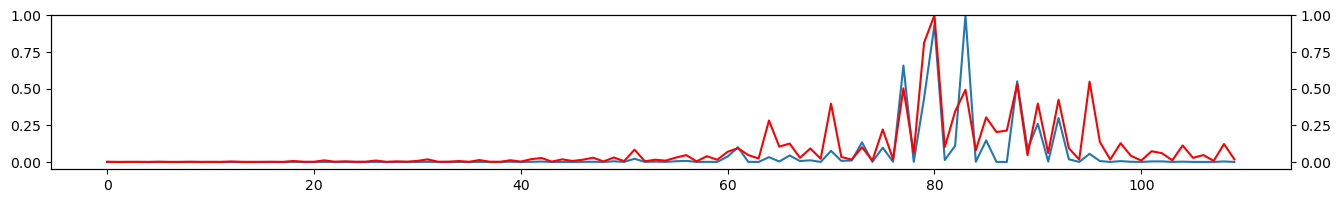

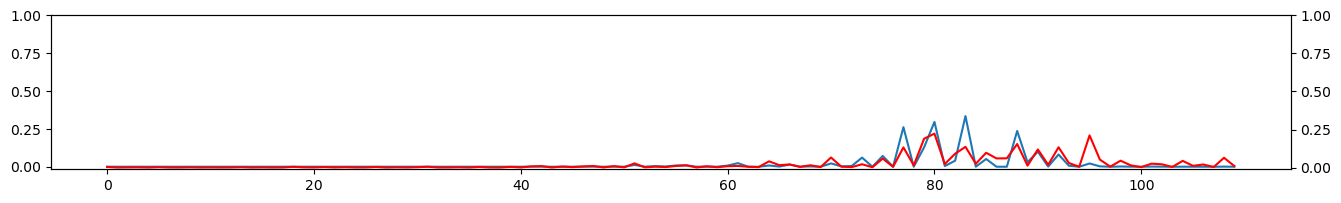

In [ ]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plot_pred = scale_to_0_1(10**(predictions[:2,290:400]/np.log(10))-1)
plt_exper = scale_to_0_1(np.array(count_all)[:2, 290:400])

for i in [0,1]:
    
    fig, ax1 = plt.subplots(figsize=(16, 2))
    ax2 = ax1.twinx()

    ax1.plot(plt_exper[i,:])
    
    ax2.plot(plot_pred[i,:], c='red')
    ax1.set_ylim(top=1)
    ax2.set_ylim(top=1)

    
    plt.show()

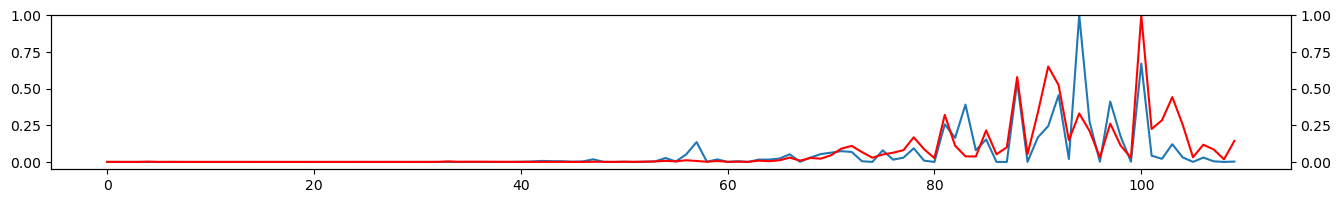

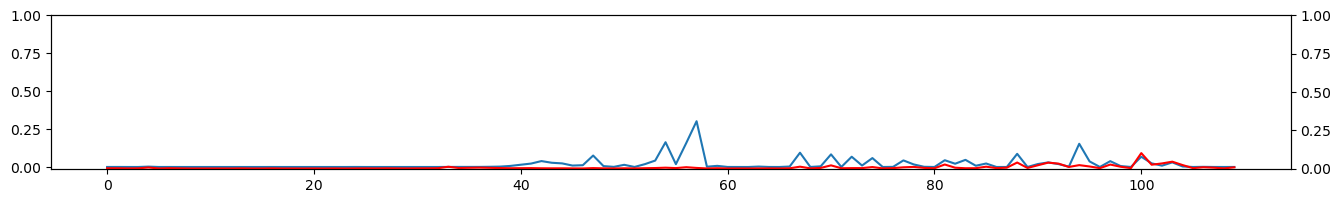

In [ ]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plot_pred = scale_to_0_1(10**(predictions[2:4,290:400]/np.log(10))-1)
plt_exper = scale_to_0_1(np.array(count_all)[2:4, 290:400])

for i in [0,1]:
    
    fig, ax1 = plt.subplots(figsize=(16, 2))
    ax2 = ax1.twinx()

    ax1.plot(plt_exper[i,:])
    
    ax2.plot(plot_pred[i,:], c='red')
    ax1.set_ylim(top=1)
    ax2.set_ylim(top=1)

    
    plt.show()

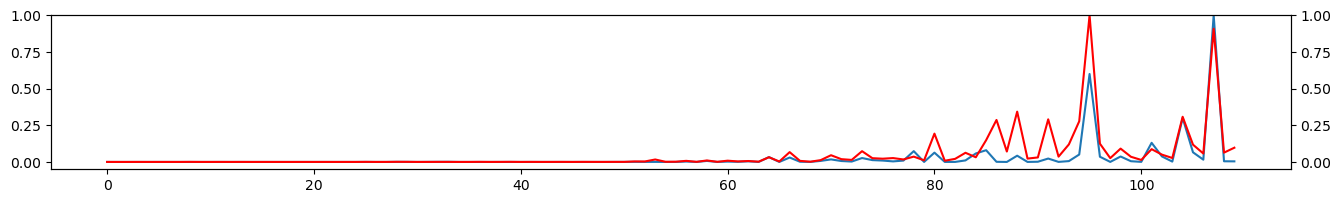

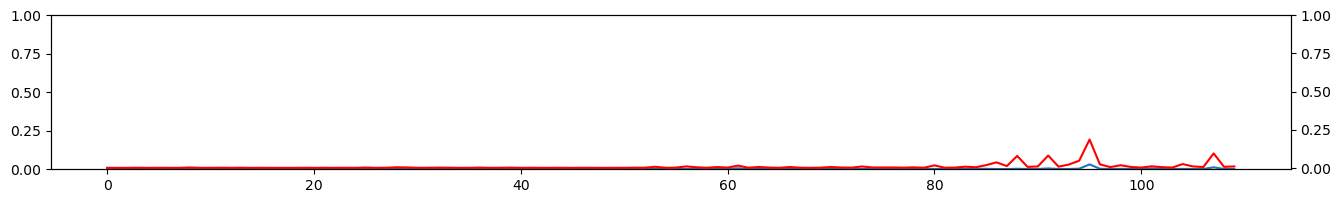

In [ ]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plot_pred = scale_to_0_1(10**(predictions[4:,290:400]/np.log(10))-1)
plt_exper = scale_to_0_1(np.array(count_all)[4:, 290:400])

for i in [0,1]:
    
    fig, ax1 = plt.subplots(figsize=(16, 2))
    ax2 = ax1.twinx()

    ax1.plot(plt_exper[i,:])
    
    ax2.plot(plot_pred[i,:], c='red')
    ax1.set_ylim(top=1)
    ax2.set_ylim(top=1)

    
    plt.show()